### Objective
In this homework, you will explore Bayesian inference using a real-world scenario: the 1997 chess match between Garry Kasparov and IBM's 
Deep Blue.  You will work through the Bayesian analysis step-by-step, understanding prior probabilities, likelihoods, posterior probabilities, and simulation.

### Introduction
In 1996, world chess champion (and human!) Gary Kasparov played a much anticipated six-game chess match against the IBM supercomputer Deep Blue. Of the six games, Kasparov won three, drew two, and lost one. Thus, Kasparov won the overall match, preserving the notion that machines don't perform as well as humans when it comes to chess. Yet Kasparov and Deep Blue were to meet again for a six-game match in 1997. Let π, denote Kasparov's chances of winning any particular game in the re-match. Thus, π is a measure of his overall skill relative to Deep Blue. Given the complexity of chess, machines, and humans, π is unknown and can vary or auctuate over time. Or, in short, π is a random variable.

In this analysis, we are investigating the probability of Garry Kasparov winning a game against IBM's Deep Blue. 
Using Bayesian inference, we update our beliefs about Kasparov's skill level based on prior knowledge and observed data.

The problem is structured as follows:

0. **Think**: Think about the problem and define the value/s we want to estimate.
1. **Prior Model**: We define initial beliefs about Kasparov's chances of winning a game before considering data.
2. **Binomial Data Model**: We use a Binomial distribution to model the number of games he wins out of six played.
3. **Likelihood Function**: We compute the probability of observing the actual game outcome for different win probabilities.
4. **Posterior Probability Model**: Using Bayes' Rule, we update our belief about Kasparov's skill after observing the match.
5. **Simulation**: We simulate possible match outcomes to verify our theoretical calculations.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from empiricaldist import Pmf

### Prior Probability Model

Before incorporating any data, we assume that Kasparov's probability of winning a single game, π, could be one of three values: 0.2, 0.5, or 0.8. 
Assign prior probabilities based on past performance and your own judgment.

In [24]:
# Define prior probabilities
pi_values = np.array([0.2, 0.5, 0.8])
prior_probs = np.array([0.10, 0.25, 0.65])

pmf_prior = Pmf(prior_probs,pi_values)
pmf_prior.normalize()
pmf_prior

,probs
0.2,0.10
0.5,0.25
0.8,0.65


### Binomial Data Model

Kasparov played six games against Deep Blue in 1997. We define the random variable Y as the number of games Kasparov wins. 
This follows a Binomial distribution with parameters n = 6 (number of games) and π (his probability of winning each game).

We observed that he won only **one** game. Define, using the Binomial distribution, the likelihood PMF.

In [25]:
# Define number of games played
n_games = 6
# Define observed wins
observed_wins = 1

# Calculate likelihood for each π value
likelihoods = stats.binom.pmf(observed_wins, n_games, pi_values)
pmf_likelihoods = Pmf(likelihoods,pi_values)
pmf_likelihoods.normalize()
pmf_likelihoods

,probs
0.2,0.804942
0.5,0.191913
0.8,0.003144


### Posterior Probability Model

Using Bayes' Rule, calculate the posterior probability for each possible π value. 
This represents our updated belief about Kasparov's win probability after observing the match results.

In [27]:
posterior_probs = pmf_prior * pmf_likelihoods 
posterior_probs.normalize()
posterior_probs

,probs
0.2,0.616737
0.5,0.367604
0.8,0.015659


Here, 
$$f(\pi\big|y=1)=\frac{f(\pi)L(\pi\big|y=1)}{f(y=1)}$$
that, for each $\pi$ become the previous table
$$\begin{aligned} & f(\pi=0.2 \mid y=1)=\frac{0.10 \cdot 0.3932}{0.0637} \approx 0.617 \\ & f(\pi=0.5|y|=1)=\frac{0.25 \cdot 0.0938}{0.0637} \approx 0.368 \\ & f(\pi=0.8 \mid y=1)=\frac{0.65 \cdot 0.0015}{0.0637} \approx 0.015\end{aligned}$$

Mainly, though we were fairly confident that Kasparov's performance would have improved from 1996 to 1997, after winning only one game, the chances of Kasparov being the dominant player (π = 0.8) dropped from 0.65 to 0.015. In fact, the scenario with the greatest posterior support is that Kasparov is the weaker player, with a win probability of only 0.2. Good news for machines. Bad news for humans.


### Posterior Simulation

To further analyze the problem:

- Simulate 50,000 matches using the prior model and observe how frequently each scenario occurs.
- Then, filter the simulations to those where Kasparov won exactly one game
- Compare the relative frequency of each π value.

In [1]:
# Simulate 50,000 scenarios
n_simulations = 50000
simulated_pi = np.random.choice(pi_values, size=n_simulations, p=prior_probs)
print('simulated_pi:',simulated_pi)
simulated_wins = np.random.binomial(n_games, simulated_pi)
print('simulated_wins:',simulated_wins)

# Filter simulations matching observed outcome
filtered_simulated_pi = simulated_pi[simulated_wins == observed_wins]
print('filtered_simulated_pi:',filtered_simulated_pi[:10])


# Compute proportions
posterior_simulation_results = pd.DataFrame({'π': pi_values})
posterior_simulation_results['Proportion'] = [np.mean(filtered_simulated_pi == pi) for pi in pi_values]
posterior_simulation_results

NameError: name 'np' is not defined

In [74]:
histo = []
for i in pi_values:
    aux=[]
    for obs_wins in range(7):
        aa = simulated_pi[simulated_wins == obs_wins]
        aux.append(np.count_nonzero(aa[aa==i]))
    histo.append(aux/np.sum(aux))

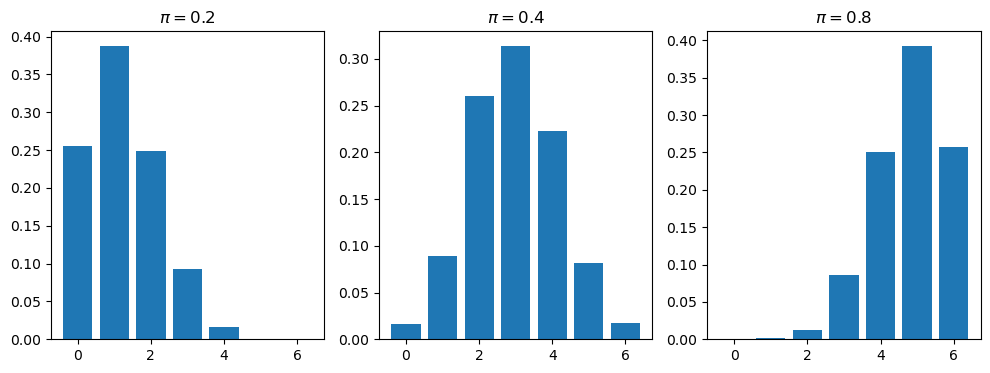

In [93]:
# Plot Prior and Posterior
width = 0.8
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].bar(range(7), histo[0], width=width, label='Prior')
ax[0].set_title(r"$\pi = 0.2$")
ax[1].bar(range(7), histo[1], width=width, label='Prior')
ax[1].set_title(r"$\pi = 0.4$")
ax[2].bar(range(7), histo[2], width=width, label='Prior')
ax[2].set_title(r"$\pi = 0.8$")

plt.show()

### Visualizing the Results

Plot the prior and posterior probability distributions to illustrate how our belief in Kasparov's win probability has changed after observing the match outcome.


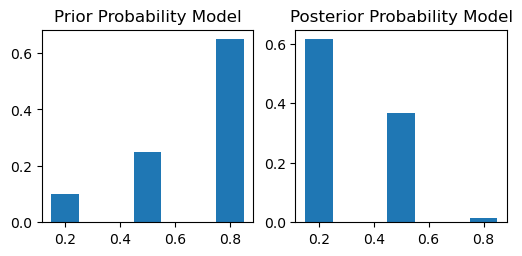

In [56]:
# Plot Prior and Posterior
fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))
ax[0].bar(pi_values, prior_probs, width=0.1, label='Prior')
ax[0].set_title("Prior Probability Model")
ax[1].bar(pi_values, posterior_probs, width=0.1, label='Posterior')
ax[1].set_title("Posterior Probability Model")
plt.show()

### Advanced Analysis

Repeat the entire process, but this time, use a different prior distribution and extend the analysis to include 100 possible values of π. Justify your choice of prior and explain how it reflects your assumptions about Kasparov's performance.

Now, let's assume Kasparov played two additional matches with the following outcomes:

- Kasparov wins 3 out of 6 games.
- Kasparov wins 2 out of 6 games.

Analyze the sensitivity of your results to the choice of prior. Discuss how different priors influence the posterior distribution and the overall conclusions drawn from the Bayesian analysis.